# Intro to Decision Trees
_Authors_: Maitiu Sexton, David Yerrington, Matt Brems

### Learning Objectives

- Explain how a decision tree functions
- Calculate and understand Gini impurity
- Build a decision tree

## How does a decision tree function?

1. Take a dataset with features $X$ and target $Y$
2. Find rules based on $X$ to best split the data at each **internal node** (colored yellow)
3. Sort the data such that each **leaf node** (colored green) is as "pure" as possible

Typically, decision trees are represented with graphs like this very simple one.

<img src="./images/decision_tree_1.png" width="750"/>

(This image was created using [Draw.io](https://www.draw.io/))

## But how do we choose which split(s) to make?

If we were to:
- Randomly select a datapoint in our node, then
- Randomly assign it a label (classify it) according to the distribution of classes in that node

Then what's the probability that we're wrong? \
That's **Gini Impurity**. You can think of it as a measure of homogeneity, or how mixed a dataset is. \
It is calculated as follows, similarly to Mean Squared Error:

### Gini Impurity Calulation
Suppose $p_i$ is the probability that class $i$ would be chosen uniformly at random out of $n$ total classes. Then:

$$
\begin{eqnarray*}
\text{Gini impurity} &=& \sum_{i=1}^{n} p_i(1 - p_i) \\
                     &=& 1 - \sum_{i=1}^{n} p_i^2 \\
\text{Gini impurity (2 classes)} &=& 1 - p_1^2 - p_2^2 \\
\text{Gini impurity (3 classes)} &=& 1 - p_1^2 - p_2^2 - p_3^2 \\
\end{eqnarray*}
$$

<details><summary>(click here for info on Gini impurity score ranges)</summary>
    
- In the case of **binary** classification, a perfectly homogeneous set will have a gini score of 0, whereas a completely random set will have a gini score of 0.5 (because you have a 50/50 chance of being right or wrong)
    
- For 3 classes, Gini impurity ranges from 0 to 0.6667
    
- If we have $k$ classes, Gini impurity ranges from 0 to $1-\frac{1}{k}$
    
</details>

In [1]:
# To better understand, let's see it in action
def gini(obs):
    
    gini_probs = list()
    
    for p_i in set(obs): # using set because we only want to look at each class once
        p = (obs.count(p_i) / len(obs))
        gini_probs.append(p ** 2)
        
    impurity = 1 - sum(gini_probs)
    
    return impurity

### Check for Understanding

1. Write an example of a list that has a Gini score of 0:

In [2]:
list_1 = ['yes', 'yes', 'yes', 'yes']

gini(list_1)

0.0

2. Write an example of a list that has a Gini score of 0.5:

In [3]:
list_2 = ['yes', 'yes', 'no', 'no']

gini(list_2)

0.5

3. What gini score do you expect the following list to have? (Try not to run the function before thinking about the question):

In [4]:
list_3 = ['yes', 'yes', 'yes', 'no']

gini(list_3)

0.375

4. _(bonus)_: Can you think of another list with the same set of elements and the same Gini score as `list_3`?

In [5]:
list_4 = ['yes', 'no', 'no', 'no']

gini(list_4)

0.375

### A decision tree chooses each split by running through all the possible splits and choosing the one with the lowest Gini score
- if the Gini score of the next node is going to be higher, it stops and creates a leaf node
- this is a **greedy** algorithm with a tendency to overfit, so we can employ early stopping and regularization (tomorrow's lesson)

## Let's build a decision tree of our own using the Iris dataset

|target|species   |
|:-----|:---------|
|0     |setosa    |
|1     |versicolor|
|2     |virginica |

In [6]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [7]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
# Train, Test, Split (use random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['species'], axis=1),
                                                    df['species'],
                                                    train_size = 0.7,
                                                    random_state = 123)

In [9]:
# Instantiate model with random_state = 123
dt = DecisionTreeClassifier(random_state = 123)

In [10]:
# Fit model
dt.fit(X_train, y_train);

In [11]:
# Evaluate model
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.9555555555555556


In [12]:
# Generate predictions on test set
preds = dt.predict(X_test)

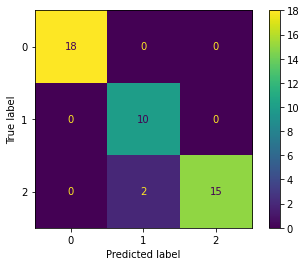

In [13]:
# Generate confusion matrix
preds = dt.predict(X_test)
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, dt.classes_).plot();

## This is how our model was actually trained

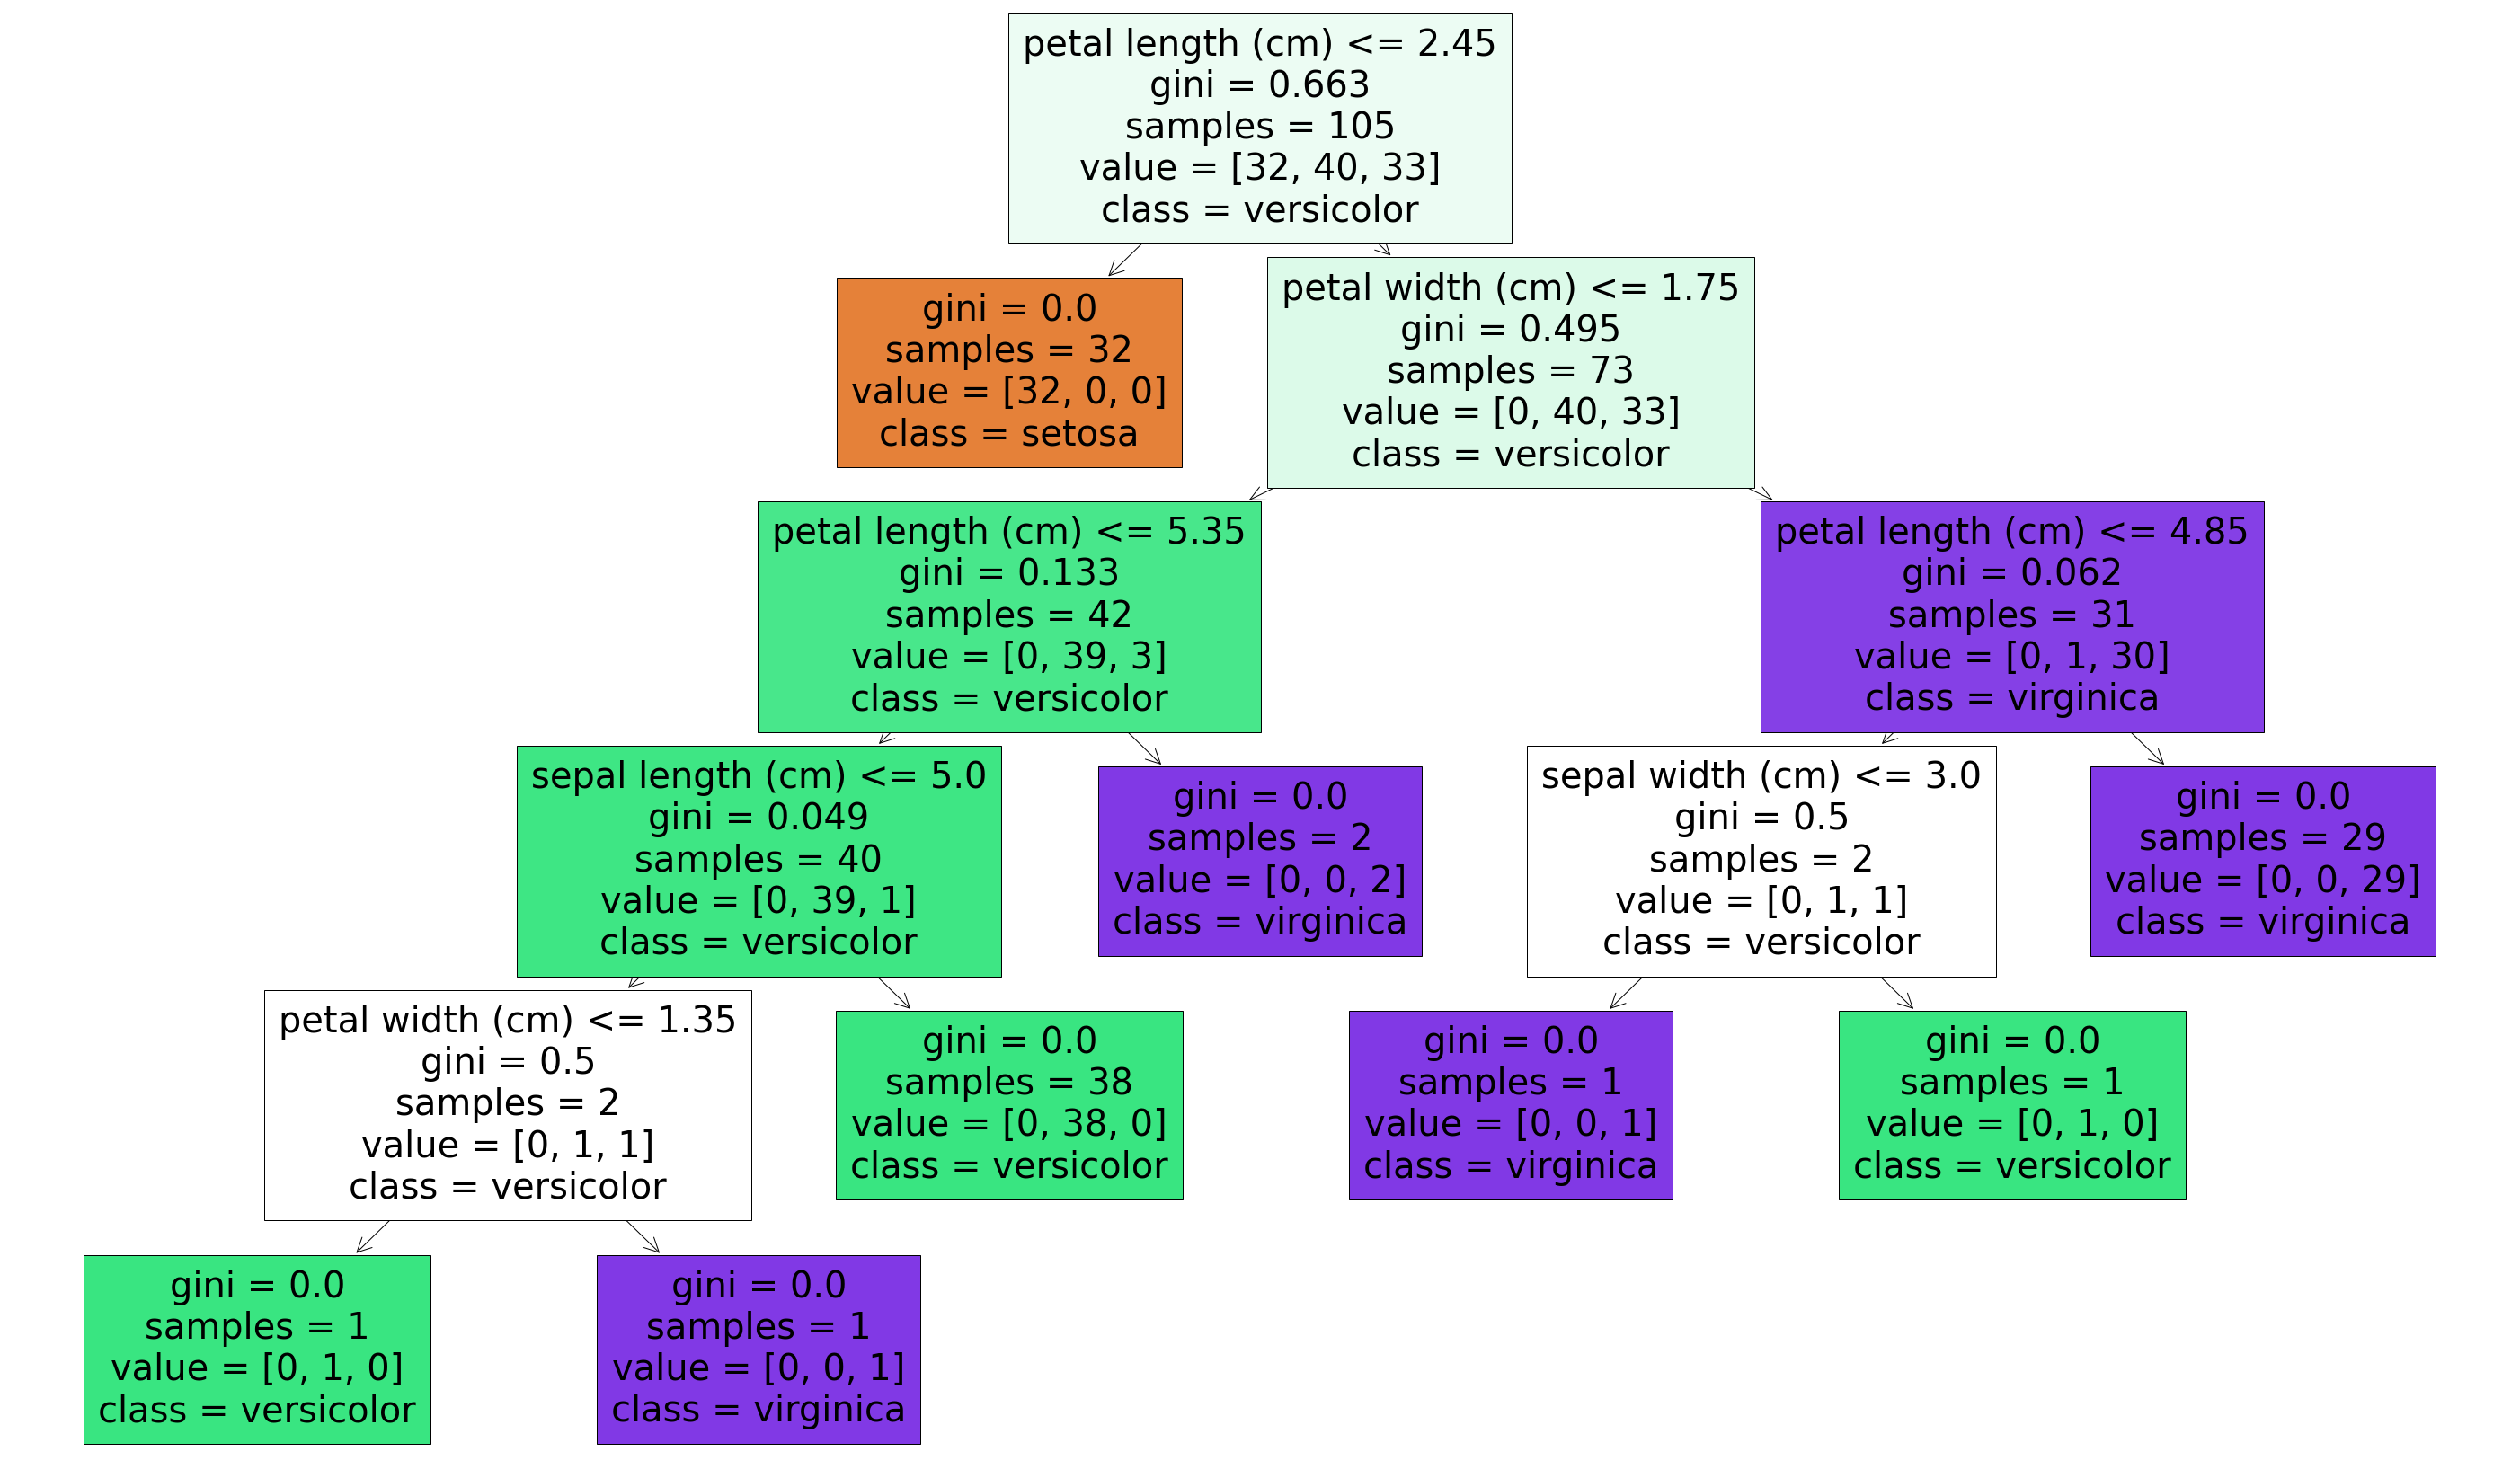

In [14]:
plt.figure(figsize = (50, 30))

# Plot our tree.
plot_tree(dt,
          feature_names = X_train.columns,
          class_names = ['setosa', 'versicolor', 'virginica'],
          filled = True);
# True values go left, False go right

## Concluding Remarks

### Pros
- nonparametric; no assumptions are made about how our data or errors are distributed
- no need to scale our data
- easy to interpret (supervised)
- fits very quickly

### Cons
- greedy algorithm
    - can very easily overfit
- algorithm is locally optimal
    - could miss patterns as you go down the tree due to already splitting out certain subset of data
- don't work well with unbalanced data
    - bias goes towards the majority class (the flip side of our first pro)

## For Further Consideration
What is an example of a situation in which you feel a decision tree would be useful?